Load multiple variables or files of same ensembl member

In [1]:
import warnings
# Warnings make for ugly notebooks, ignore them
warnings.filterwarnings('ignore')

In [2]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy
import dask

In [3]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
output_notebook()

Loading BokehJS ...

In [4]:
fns = [
    'data/2017-11-21/work01/output/netcdf/discharge_dailyTot_output.nc', 
    'data/2017-11-21/work01/output/netcdf/totalEvaporation_dailyTot_output.nc',
    'data/2017-11-21/work01/output/netcdf/satDegUppSurface_dailyTot_output.nc',
]

In [5]:
cubes = iris.load(fns)
cubes

[<iris 'Cube' of discharge / (m3.s-1) (time: 9; latitude: 2160; longitude: 4320)>,
<iris 'Cube' of near_surface_soil_saturation_degree / (1) (time: 9; latitude: 2160; longitude: 4320)>,
<iris 'Cube' of total_evaporation / (m.day-1) (time: 9; latitude: 2160; longitude: 4320)>]

In [6]:
alocation = [('longitude', 4.799652), ('latitude', 52.331815)]

In [7]:
cubes_of_loc = [cube.interpolate(alocation, iris.analysis.Nearest()) for cube in cubes]

# Draw using iris

In [8]:
dis = cubes_of_loc[0]

In [9]:
dis

<iris 'Cube' of discharge / (m3.s-1) (time: 9)>

In [11]:
dis.data

masked_array(data=[1.208240270614624, 1.1664493083953857,
                   1.2209101915359497, 3.941112518310547,
                   3.06866455078125, 2.125112295150757,
                   1.8235832452774048, 1.7650593519210815,
                   2.086449384689331],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=1e+20,
            dtype=float32)

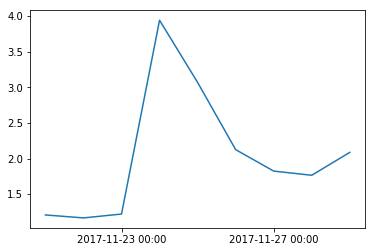

In [12]:
iplt.plot(dis)

# Draw using bokeh

In [13]:
dts = [dt.point for dt in dis.coord('time').cells()]

In [62]:
p = figure(x_axis_type='datetime', output_backend="webgl")
[p.line(dts, cube.data, legend=cube.name(), color=Spectral6[i]) for i, cube in enumerate(cubes_of_loc)]
show(p)

In [14]:
p = figure(x_axis_type='datetime', output_backend="webgl")
[p.line(dts, cube.data, legend=cube.name(), color=Spectral6[i]) for i, cube in enumerate(cubes_of_loc)]
show(p)